# Get Latitude and Longitude By Cities with OpenCageData API
----

* Source: https://api.opencagedata.com
* URL Encoding for city names

In [1]:
# Dependencies
import requests
import pandas as pd
from config import api_key

In [2]:
# Import Generated Location csv file
loc_csv_filepath = "../Transformed Data/location-summary.csv"

In [3]:
# Open csv file
with open(loc_csv_filepath, 'r', encoding='utf-8') as loc_file:
    df_loc = pd.read_csv(loc_file)

df_loc

,country_id,city,state
0,2,Regina,SK
1,2,Vaudreuil-Dorion,QC
2,2,Calgary,AB
3,2,Iqaluit,NU
4,2,Lethbridge,AB
...,...,...,...
1072,1,North-East Singapore,Singapore
1073,1,Tanglin,Singapore
1074,1,Raffles,Singapore
1075,1,Central Business District,Singapore


In [4]:
# Create empty lists for lat and lng
list_lat = []
list_lng = []

In [5]:
# Iterate over rows in dataframe\
for index, row in df_loc.iterrows(): 

    # Concatenate city and state column and convert to url encoding
    City = row['city']
    State = row['state']       
    city_query = str(City)+', '+str(State)
    url_city = requests.utils.quote(city_query)

    # Check the country id for each city
    if row["country_id"] == 1:
        country_code = "sg"
    elif row["country_id"] == 2:
        country_code = "ca"
    elif row["country_id"] == 3:
        country_code = "us"
    else:
        country_code = "au"

    # Combine into query url
    url = f"https://api.opencagedata.com/geocode/v1/json?key={api_key}&q={url_city}&countrycode={country_code}&limit=1&pretty=1"

    # Set Forward geocoding API request
    response = requests.get(url).json()

    # Try to get lat and lng, if error, return as NaN
    try:
        lat = response["results"][0]["geometry"]["lat"]
        lng = response["results"][0]["geometry"]["lng"]
    except:
        lat = lng = np.nan
    
    if index % 10 == 0:
        print(f"Row({index}): Logging {city_query} with lat: {lat} & lng: {lng}")

    list_lat.append(lat)
    list_lng.append(lng)

print("API data query done.")

Row(0): Logging Regina, SK with lat: 50.44876 & lng: -104.61731
Row(10): Logging Saskatoon, SK with lat: 52.131802 & lng: -106.660767
Row(20): Logging Burnaby, BC with lat: 49.2433804 & lng: -122.9725459
Row(30): Logging Westmount, QC with lat: 45.4857329 & lng: -73.5963951
Row(40): Logging Haines Junction, YT with lat: 60.7527212 & lng: -137.5100384
Row(50): Logging Moncton, NB with lat: 46.097995 & lng: -64.80011
Row(60): Logging Whitehorse, YT with lat: 60.721571 & lng: -135.054932
Row(70): Logging Dieppe, NB with lat: 46.0945258 & lng: -64.7354772
Row(80): Logging Brantford, ON with lat: 43.1408157 & lng: -80.2631733
Row(90): Logging Châteauguay, QC with lat: 45.3619066 & lng: -73.7524319
Row(100): Logging Fredericton, NB with lat: 45.966425 & lng: -66.645813
Row(110): Logging Essex, ON with lat: 42.1744783 & lng: -82.8215468
Row(120): Logging Ermineskin 138, AB with lat: 53.4577179 & lng: -113.505378
Row(130): Logging Tecumseh, ON with lat: 42.3117951 & lng: -82.8861974
Row(140): 

In [6]:
# Putting coordinate info into df
df_loc["lat"] = list_lat
df_loc["lng"] = list_lng

In [7]:
# Show dataframe with lat/lng info
df_loc

,country_id,city,state,lat,lng
0,2,Regina,SK,50.448760,-104.617310
1,2,Vaudreuil-Dorion,QC,45.397151,-74.025458
2,2,Calgary,AB,51.053423,-114.062589
3,2,Iqaluit,NU,63.749440,-68.521857
4,2,Lethbridge,AB,49.694285,-112.851562
...,...,...,...,...,...
1072,1,North-East Singapore,Singapore,1.290475,103.852036
1073,1,Tanglin,Singapore,1.306044,103.815280
1074,1,Raffles,Singapore,1.283542,103.851460
1075,1,Central Business District,Singapore,1.289670,103.850070


In [10]:
# Export location df to csv for city location API use
df_loc.to_csv("../Transformed Data/Location-coordinates.csv", index=False, header=True)

## A simple map to show company locations
----

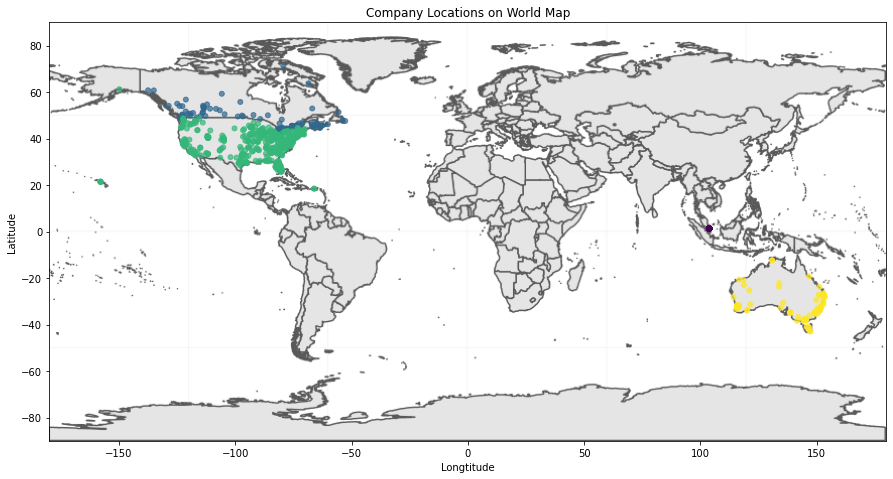

In [12]:
# Import a world map image as the background
ruh_m = plt.imread("../Raw Data/map.png")
BBox = (-180, 180, -90, 90)

# Plot scatter points from longtitude and latitude
fig, ax = plt.subplots(figsize = (15, 8))
sm = ax.scatter(df_loc["lng"], df_loc["lat"], zorder=1, c = df_loc["country_id"], alpha= 0.7, s = 25)

# Set the x, y limits same as the world map
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.set_title("Company Locations on World Map")
ax.set_xlabel("Longtitude")
ax.set_ylabel("Latitude")
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.show()